Import required libraries


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
# load dataset
fraud_df = pd.read_csv("/content/creditcard.csv")

In [ ]:
print(fraud_df.shape)

(284807, 31)


In [ ]:
fraud_df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

In [ ]:
fraud_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
target = 'Class'

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fbfb0bb0990>],
      dtype=object)

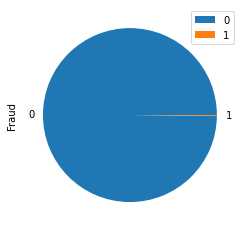

In [ ]:
Fraud_class = pd.DataFrame({'Fraud': fraud_df['Class']})
Fraud_class.apply(pd.value_counts).plot(kind='pie',subplots=True)


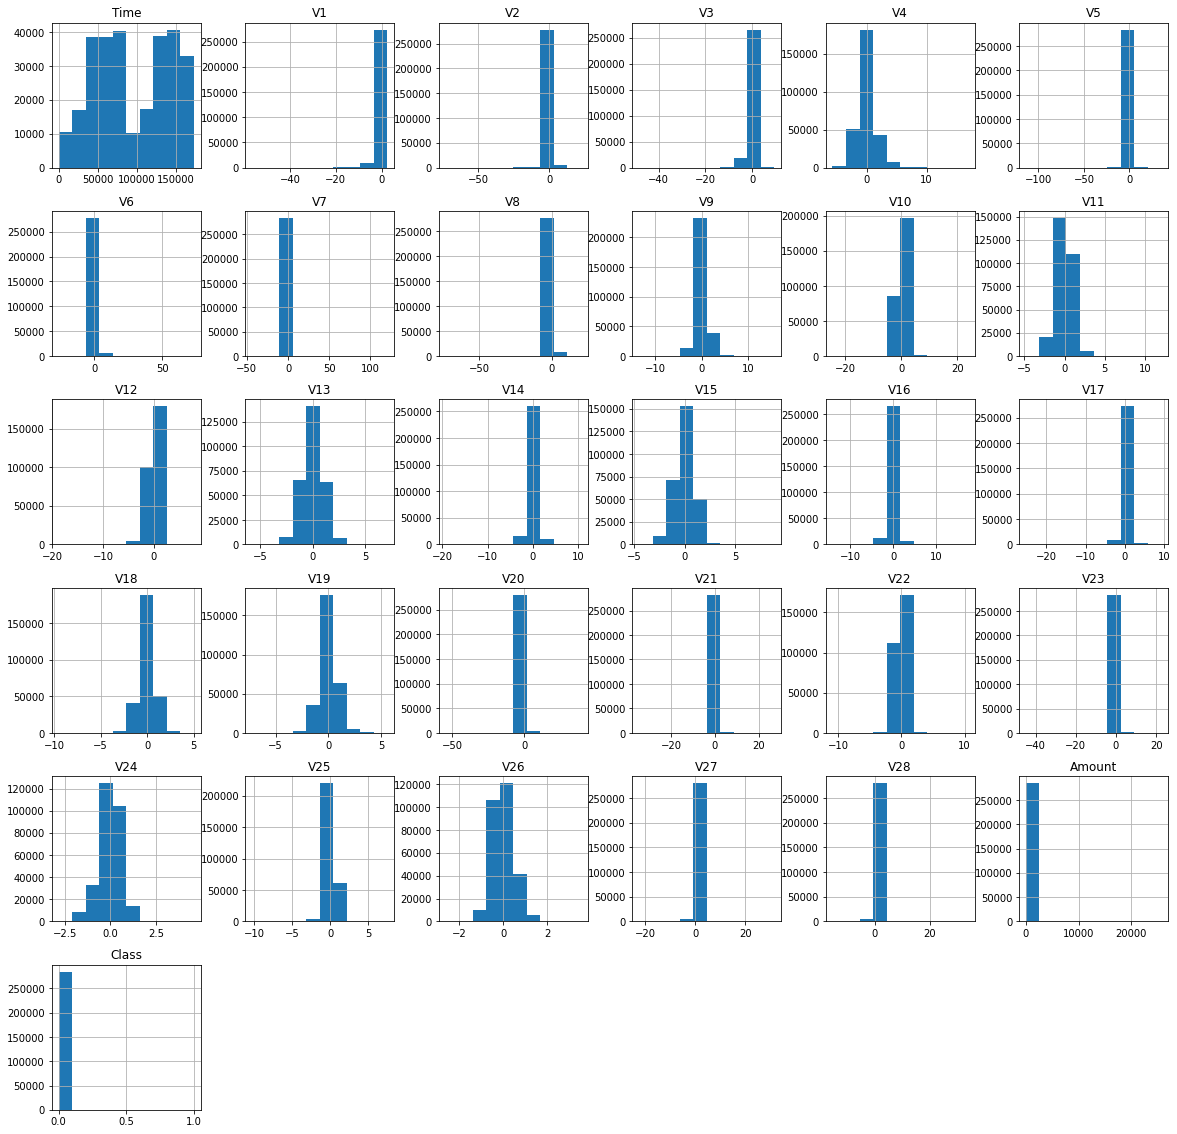

In [ ]:
fraud_df.hist(figsize=(20,20))
plt.show()

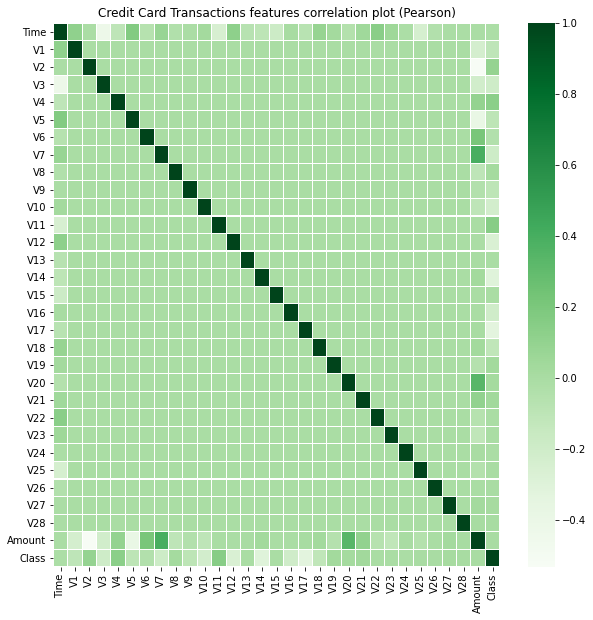

In [ ]:
plt.figure(figsize = (10,10))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = fraud_df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Greens")
plt.show()

**Data Preprocessing**

In [ ]:
print(f"Dataset info :- \n {fraud_df.info()}")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [ ]:
fraud_df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,norm_amount
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,2.848070e+05
mean,94813.859575,1.758743e-12,-8.252298e-13,-9.636929e-13,8.316157e-13,1.591952e-13,4.247354e-13,-3.050180e-13,8.693344e-14,-1.179712e-12,7.094854e-13,1.875015e-12,1.053488e-12,7.137527e-13,-1.491363e-13,-5.225914e-13,-2.280712e-13,-6.428517e-13,4.958987e-13,7.060712e-13,1.766038e-12,-3.406543e-13,-5.713163e-13,-9.725303e-13,1.464139e-12,-6.989087e-13,-5.615260e-13,3.332112e-12,-3.518886e-12,0.001727,3.202236e-16
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,1.088850e+00,1.020713e+00,9.992014e-01,9.952742e-01,9.585956e-01,9.153160e-01,8.762529e-01,8.493371e-01,8.381762e-01,8.140405e-01,7.709250e-01,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,0.041527,1.000002e+00
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,-2.458826e+01,-4.797473e+00,-1.868371e+01,-5.791881e+00,-1.921433e+01,-4.498945e+00,-1.412985e+01,-2.516280e+01,-9.498746e+00,-7.213527e+00,-5.449772e+01,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,-3.532294e-01
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,-5.354257e-01,-7.624942e-01,-4.055715e-01,-6.485393e-01,-4.255740e-01,-5.828843e-01,-4.680368e-01,-4.837483e-01,-4.988498e-01,-4.562989e-01,-2.117214e-01,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,0.000000,-3.308401e-01
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,-9.291738e-02,-3.275735e-02,1.400326e-01,-1.356806e-02,5.060132e-02,4.807155e-02,6.641332e-02,-6.567575e-02,-3.636312e-03,3.734823e-03,-6.248109e-02,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,0.000000,-2.652715e-01
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,4.539234e-01,7.395934e-01,6.182380e-01,6.625050e-01,4.931498e-01,6.488208e-01,5.232963e-01,3.996750e-01,5.008067e-01,4.589494e-01,1.330408e-01,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,0.000000,-4.471707e-02
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,2.374514e+01,1.201891e+01,7.848392e+00,7.126883e+00,1.052677e+01,8.877742e+00,1.731511e+01,9.253526e+00,5.041069e+00,5.591971e+00,3.942090e+01,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,1.000000,1.023622e+02


**Data Transformation**

In [ ]:
print(f"few values of Amount column :- \n {fraud_df['Amount'][0:4]}")


few values of Amount column :- 
 0    149.62
1      2.69
2    378.66
3    123.50
Name: Amount, dtype: float64


In [ ]:
# data preprocessing
from sklearn.preprocessing import StandardScaler
fraud_df['norm_amount'] = StandardScaler().fit_transform(
fraud_df['Amount'].values.reshape(-1,1))
fraud_df = fraud_df.drop(['Amount'], axis=1)
print(f"few values of Amount column after applying StandardScaler:- \n {fraud_df['norm_amount'][0:4]}")


few values of Amount column after applying StandardScaler:- 
 0    0.244964
1   -0.342475
2    1.160686
3    0.140534
Name: norm_amount, dtype: float64


0    284315
1       492
Name: Class, dtype: int64


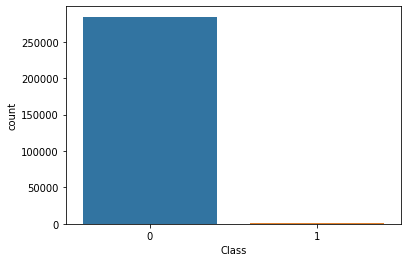

In [ ]:
ax = sns.countplot(x=target, data=fraud_df)
print(fraud_df[target].value_counts())

**Splitting dataset **

In [ ]:
## Features and target creations
x = fraud_df.drop(['Class'], axis=1)
y = fraud_df[['Class']]

In [ ]:
# splitting dataset to train & test dataset
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.73, random_state=20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(207909, 30)
(207909, 1)
(76898, 30)
(76898, 1)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score,recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
def generate_model_report(y_actual,y_predicted):
  print("Accuracy= ",accuracy_score(y_actual, y_predicted))
  print("Precision= ",precision_score(y_actual, y_predicted))
  print("Recall= ",recall_score(y_actual, y_predicted))
  print("F1 Score= ",f1_score(y_actual, y_predicted))
  print("Confusion Matrix: ", confusion_matrix(y_actual, y_predicted))
  pass

In [ ]:
fraud_df.replace([np.inf, -np.inf], np.nan, inplace=True)

In [ ]:
clf= LogisticRegression().fit(x_train,y_train)
y_Test_Pred = clf.predict(x_test)
generate_model_report(y_test, y_Test_Pred)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


Accuracy=  0.9988946396525267
Precision=  0.6384615384615384
Recall=  0.6859504132231405
F1 Score=  0.6613545816733067
Confusion Matrix:  [[76730    47]
 [   38    83]]


In [ ]:
tree_Cla = DecisionTreeClassifier().fit(x_train,y_train)
y_Test_Pred = tree_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

Accuracy=  0.8909774436090225
Precision=  0.8905109489051095
Recall=  0.8970588235294118
F1 Score=  0.8937728937728938
Confusion Matrix:  [[115  15]
 [ 14 122]]


In [ ]:
forest_Cla = RandomForestClassifier().fit(x_train,y_train)
y_Test_Pred = forest_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy=  0.999635881297303
Precision=  0.9603960396039604
Recall=  0.8016528925619835
F1 Score=  0.8738738738738738
Confusion Matrix:  [[76773     4]
 [   24    97]]


In [ ]:
knn_Cla = KNeighborsClassifier().fit(x_train,y_train)
y_Test_Pred = knn_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy=  0.9985695336679757
Precision=  1.0
Recall=  0.09090909090909091
F1 Score=  0.16666666666666669
Confusion Matrix:  [[76777     0]
 [  110    11]]


In [ ]:
nb_Cla = BernoulliNB().fit(x_train,y_train)
y_Test_Pred = nb_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Accuracy=  0.9992457541158417
Precision=  0.8247422680412371
Recall=  0.6611570247933884
F1 Score=  0.7339449541284403
Confusion Matrix:  [[76760    17]
 [   41    80]]


In [ ]:
minority_class_len = len(fraud_df[fraud_df[target]==1])
print(minority_class_len)

492


In [ ]:
majority_class_indices = fraud_df[fraud_df[target]==0].index
print(majority_class_indices)

Int64Index([     0,      1,      2,      3,      4,      5,      6,      7,
                 8,      9,
            ...
            284797, 284798, 284799, 284800, 284801, 284802, 284803, 284804,
            284805, 284806],
           dtype='int64', length=284315)


In [ ]:
random_majority_indices = np.random.choice(majority_class_indices,minority_class_len,replace=False)
print(len(random_majority_indices))

492


In [ ]:
minority_class_indices=fraud_df[fraud_df[target]==1].index
print(minority_class_indices)

Int64Index([   541,    623,   4920,   6108,   6329,   6331,   6334,   6336,
              6338,   6427,
            ...
            274382, 274475, 275992, 276071, 276864, 279863, 280143, 280149,
            281144, 281674],
           dtype='int64', length=492)


In [ ]:
under_sample_indices = np.concatenate([minority_class_indices,random_majority_indices])

In [ ]:
under_sample = fraud_df.loc[under_sample_indices]

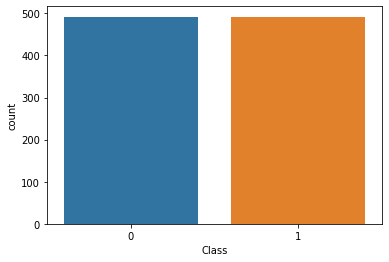

In [ ]:
sns.countplot(x=target, data=under_sample)

In [ ]:
x = under_sample.loc[:, fraud_df.columns!=target]
y = under_sample.loc[:, fraud_df.columns==target]
x_train, x_test, y_train, y_test = train_test_split(x,y, train_size=0.73, random_state=42)

In [ ]:
clf= LogisticRegression().fit(x_train, y_train)
y_Test_Pred = clf.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

Accuracy=  0.9360902255639098
Precision=  1.0
Recall=  0.875
F1 Score=  0.9333333333333333
Confusion Matrix:  [[130   0]
 [ 17 119]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
tree_Cla = DecisionTreeClassifier().fit(x_train,y_train)
y_Test_Pred = tree_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

Accuracy=  0.9097744360902256
Precision=  0.917910447761194
Recall=  0.9044117647058824
F1 Score=  0.9111111111111111
Confusion Matrix:  [[119  11]
 [ 13 123]]


In [ ]:
forest_Cla = RandomForestClassifier().fit(x_train,y_train)
y_Test_Pred = forest_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


Accuracy=  0.9511278195488722
Precision=  0.984251968503937
Recall=  0.9191176470588235
F1 Score=  0.9505703422053232
Confusion Matrix:  [[128   2]
 [ 11 125]]


In [ ]:
knn_Cla = KNeighborsClassifier().fit(x_train,y_train)
y_Test_Pred = knn_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

Accuracy=  0.6165413533834586
Precision=  0.6164383561643836
Recall=  0.6617647058823529
F1 Score=  0.6382978723404255
Confusion Matrix:  [[74 56]
 [46 90]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  """Entry point for launching an IPython kernel.


In [ ]:
nb_Cla = BernoulliNB().fit(x_train,y_train)
y_Test_Pred = nb_Cla.predict(x_test)
generate_model_report(y_test, y_Test_Pred)

Accuracy=  0.8984962406015038
Precision=  0.9823008849557522
Recall=  0.8161764705882353
F1 Score=  0.891566265060241
Confusion Matrix:  [[128   2]
 [ 25 111]]


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
